<a href="https://colab.research.google.com/github/LOOKatKimhyein/CRM-analysis/blob/main/%EA%B0%95%EC%9D%98%ED%95%84%EA%B8%B0_6_%EC%8A%A4%EC%BD%94%EC%96%B4%EC%B9%B4%EB%93%9C(20230218).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 평점표 모형 


##1.환경 설정


### 1.1 분석에 필요한 library 호출 및 google drive 연결

In [ ]:
## 분석에 사용할 패키지 로딩

# 데이터 핸들링
import numpy as np
import pandas as pd 

#시각화 
import matplotlib.pyplot as plt
import seaborn as sns

# 학습 훈련 데이터 분리 
from sklearn.model_selection import train_test_split

#로지스틱 회귀 알고리즘
from sklearn.linear_model import LogisticRegression #sklearn에 있는 로지스틱
import statsmodels.api as sm #stat에 있는 로지스틱

# 정확도 확인
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_roc_curve

In [ ]:
## pandas 옵션 모든 컬럼 표시
pd.set_option('display.max_columns', None)
pd.set_option('display.max_seq_items', None)
# pd.set_option('display.max_rows', None)

# 그래프 스타일 선택 
plt.style.use('ggplot')  

In [ ]:
## 구글 드라이브에 있는  데이터셋 연결을 위한 구글드라이브 세팅
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##2.데이터 불러오기 및 확인


### 2.1 데이터 불러오기 및 데이터 확인 

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/2.offline_study/러닝스푼즈-CRM Analysis/CRM-Analysis/DAY6/german.data',
                   delimiter=' ', # 데이터 구분이 tab
                   names= ['checking','duration','history','purpose','amount',
                           'savings','employed','installp','marital','coapp',
                           'resident','property','age','other','housing',
                           'existrc','job', 'depends', 'telephon','foreign','good_bad']) #컬럼명이 없어서 지정
data.head()

,checking,duration,history,purpose,amount,savings,employed,installp,marital,coapp,resident,property,age,other,housing,existrc,job,depends,telephon,foreign,good_bad
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,4,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,2,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,3,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,4,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,4,A124,53,A143,A153,2,A173,2,A191,A201,2


In [ ]:
data.tail()

,checking,duration,history,purpose,amount,savings,employed,installp,marital,coapp,resident,property,age,other,housing,existrc,job,depends,telephon,foreign,good_bad
995,A14,12,A32,A42,1736,A61,A74,3,A92,A101,4,A121,31,A143,A152,1,A172,1,A191,A201,1
996,A11,30,A32,A41,3857,A61,A73,4,A91,A101,4,A122,40,A143,A152,1,A174,1,A192,A201,1
997,A14,12,A32,A43,804,A61,A75,4,A93,A101,4,A123,38,A143,A152,1,A173,1,A191,A201,1
998,A11,45,A32,A43,1845,A61,A73,4,A93,A101,4,A124,23,A143,A153,1,A173,1,A192,A201,2
999,A12,45,A34,A41,4576,A62,A71,3,A93,A101,4,A123,27,A143,A152,1,A173,1,A191,A201,1


In [ ]:
## 전체 데이터 모양 확인
data.shape

(1000, 21)

In [ ]:
## 각 컬럼별 유형 확인
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   checking  1000 non-null   object
 1   duration  1000 non-null   int64 
 2   history   1000 non-null   object
 3   purpose   1000 non-null   object
 4   amount    1000 non-null   int64 
 5   savings   1000 non-null   object
 6   employed  1000 non-null   object
 7   installp  1000 non-null   int64 
 8   marital   1000 non-null   object
 9   coapp     1000 non-null   object
 10  resident  1000 non-null   int64 
 11  property  1000 non-null   object
 12  age       1000 non-null   int64 
 13  other     1000 non-null   object
 14  housing   1000 non-null   object
 15  existrc   1000 non-null   int64 
 16  job       1000 non-null   object
 17  depends   1000 non-null   int64 
 18  telephon  1000 non-null   object
 19  foreign   1000 non-null   object
 20  good_bad  1000 non-null   int64 
dtypes: int64(8), ob

In [ ]:
## Target 비율 확인 
pd.concat(
    [data['good_bad'].value_counts(dropna= False, sort = False),
     data['good_bad'].value_counts(dropna= False, sort = False, normalize =True)*100]
     , axis = 1)

## 타겟이 1,2로 되어있음. 

,good_bad,good_bad
1,700,70.0
2,300,30.0


In [ ]:
## 2를 0으로 바꾸기 
data['good_bad'] = data['good_bad'].apply(lambda x: 1 if x == 1 else 0)

## 1은 정상 2가 부도  0과 1로 바꾸기 
data['good_bad'].value_counts()

1    700
0    300
Name: good_bad, dtype: int64

##3.Null값 확인 및 처리


### 3.1 Null 값 확인

In [ ]:
## data 에 포함된  Null 값 수 확인 
print(data.isnull().sum().sum())

print(data.isnull().sum().sum()/data.shape[0])

## 0건 

0
0.0


## 4.EDA


### 4.1 시각화 함수 생성 

In [ ]:
# 명속형 변수 그래프 생성 함수 
def bar_plot (colname, taget_colname): # colname : 그래프 그릴 컬럼명 , taget_colname: target 컬럼명

## 그래프용 데이터 생성 
  temp = data.reset_index().groupby([colname,taget_colname]).index.count()
  temp = temp.reset_index()
  temp = temp.pivot(index = colname, columns = taget_colname, values ='index')
  temp['row_sum'] = temp.sum(axis=1)
  temp['0_rate'] = temp[0]/temp['row_sum']
  temp['1_rate'] = temp[1]/temp['row_sum']
 
 # IV 계산을 위한 데이터  
  temp['col_0_rate']= temp[0]/temp.sum(axis =0)[0]
  temp['col_1_rate']= temp[1]/temp.sum(axis =0)[1]
  temp['woe'] =np.log(temp['col_1_rate']/temp['col_0_rate'])
  temp['diff_rate'] = temp['col_1_rate'] - temp['col_0_rate'] 
  temp['iv'] = temp['diff_rate'] *temp['woe']

## 그래프
  fig = plt.figure()
  aig, ax = plt.subplots(ncols = 2 , figsize =(12,5))
## 빈도 막대 그래프 
  temp[[0,1]].plot.bar(stacked = True ,ax= ax[0])
  ax[0].legend(labels=[0,1],title =taget_colname) # 범례 순서 바꾸기 
  plt.xlabel(colname)
## 구간별 타겟 비율 막대 그래프 
  temp[['0_rate','1_rate']].plot.bar(stacked = True ,ax= ax[1])
  ax[1].legend(labels=[0,1],title =taget_colname) # 범례 순서 바꾸기 
  plt.xlabel(colname)
  plt.show()
  print(colname," IV : ",temp.sum(axis =0)['iv'])


In [ ]:
## IV>= 0.1~0.3 커야 의미잇다고 생각

<Figure size 432x288 with 0 Axes>

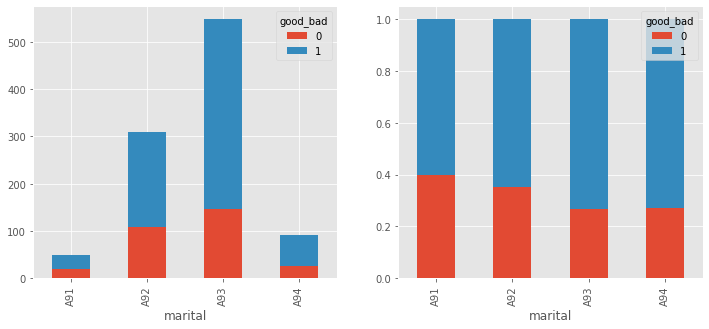

marital  IV :  0.04467067763379073


In [ ]:
bar_plot('marital','good_bad')

In [ ]:
## 연속형 변수 그래프 생성 함수 
def hist_plot (colname, taget_colname, n_bin = 10) : # colname : 그래프 그릴 컬럼명 , taget_colname: n_bin : 구간갯수 

  n_bins = int(n_bin) 
  data['bin'] = pd.cut(data[colname],bins = n_bins)

  temp = data.reset_index().groupby([taget_colname,'bin']).index.count().reset_index() # 구간화
  temp = temp.pivot(index = 'bin',columns = taget_colname, values = 'index')
  temp['row_sum'] = temp.sum(axis = 1) # 각각의 비율을 만들기 위해 구간 합계 생성
  temp['0_rate'] = temp[0]/temp['row_sum'] #각 row의 0의 비율 
  temp['1_rate'] = temp[1]/temp['row_sum'] #각 row의 1의 비율 
 
 # IV 계산을 위한 데이터  
  temp['col_0_rate']= temp[0]/temp.sum(axis =0)[0]
  temp['col_1_rate']= temp[1]/temp.sum(axis =0)[1]
  temp['woe'] =np.log(temp['col_1_rate']/temp['col_0_rate'])
  temp['diff_rate'] = temp['col_1_rate'] - temp['col_0_rate'] 
  temp['iv'] = temp['diff_rate'] *temp['woe']

  ## 그래프
  fig = plt.figure()
  aig, ax = plt.subplots(ncols = 2 , figsize =(12,5))
  
  ## 첫번째  히스토그램 
  sns.histplot(data = data, x= colname, hue= taget_colname, bins = n_bins, color=['orange','blue'], alpha  = 0.5, hue_order= (0,1), ax= ax[0])

  ## 구간별 타겟비율 그래프
  temp[['0_rate','1_rate']].plot.bar(stacked = True ,ax= ax[1])
  ax[1].legend(labels=[0,1],title =taget_colname) # 범례 순서 바꾸기 
  plt.xlabel(colname)
  plt.show()

  print(colname," IV : ",temp.sum(axis =0)['iv'])

/usr/local/lib/python3.8/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Figure size 432x288 with 0 Axes>

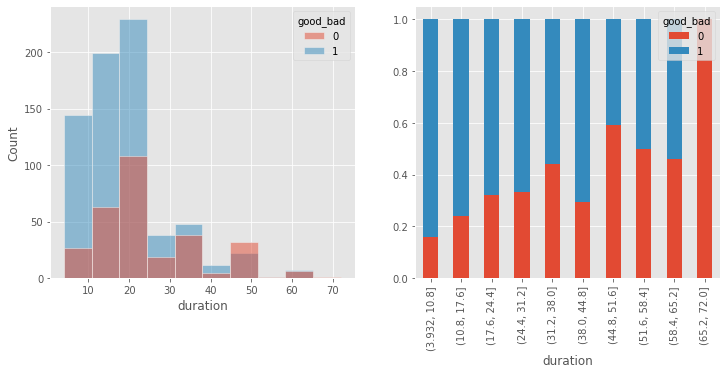

duration  IV :  inf


In [ ]:
hist_plot('duration','good_bad')
# 값이 없는 구간이 있어서 IV값이 산출안됨

In [ ]:
## 연속형 변수 및 명목형 변수 리스 생성 
int_colname = []
cat_colname = []
for i in data.columns :
  if pd.api.types.is_numeric_dtype(data[i]) == True :
    int_colname.append(i)
  elif pd.api.types.is_string_dtype(data[i]) == True :
    cat_colname.append(i)
print(int_colname)
print(cat_colname)

['duration', 'amount', 'installp', 'resident', 'age', 'existrc', 'depends', 'good_bad']
['checking', 'history', 'purpose', 'savings', 'employed', 'marital', 'coapp', 'property', 'other', 'housing', 'job', 'telephon', 'foreign']


### 4.2 연속형 변수 탐색

/usr/local/lib/python3.8/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Figure size 432x288 with 0 Axes>

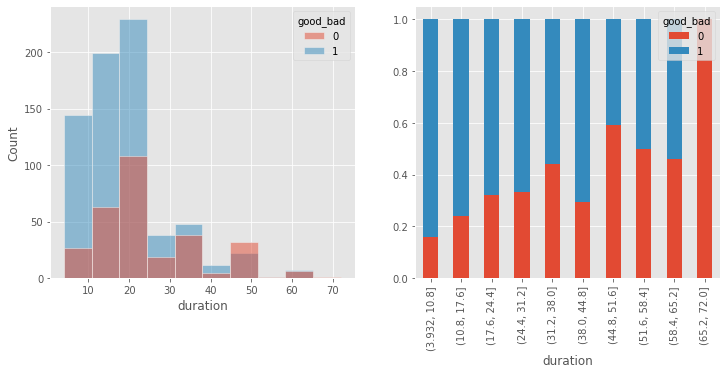

duration  IV :  inf


/usr/local/lib/python3.8/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Figure size 432x288 with 0 Axes>

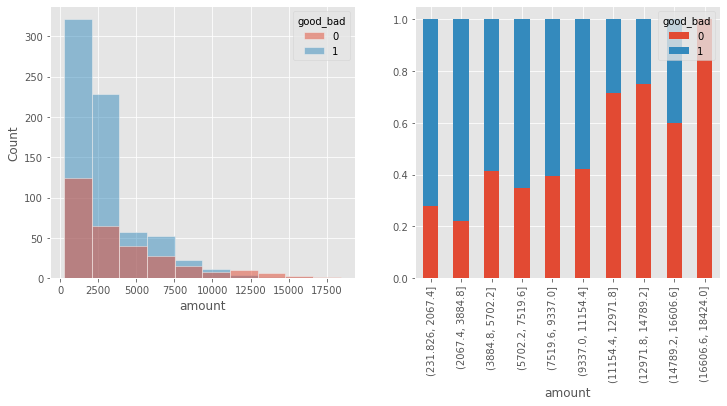

amount  IV :  inf


<Figure size 432x288 with 0 Axes>

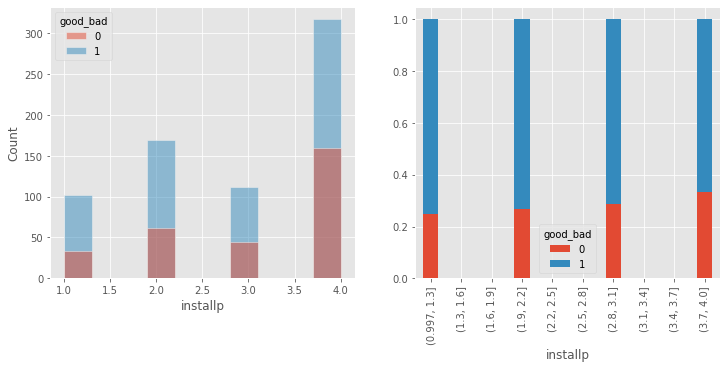

installp  IV :  0.026322090054334526


<Figure size 432x288 with 0 Axes>

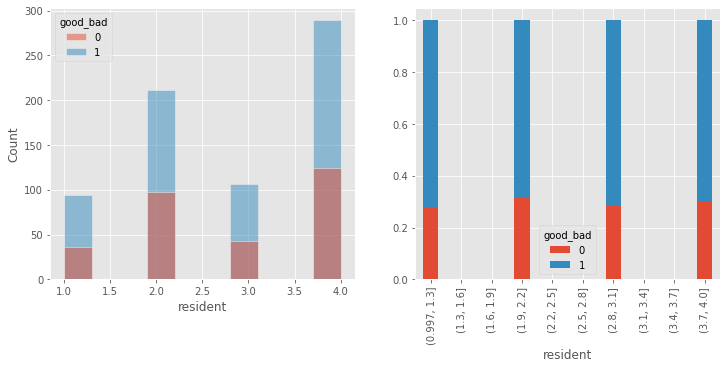

resident  IV :  0.0035887731887050208


<Figure size 432x288 with 0 Axes>

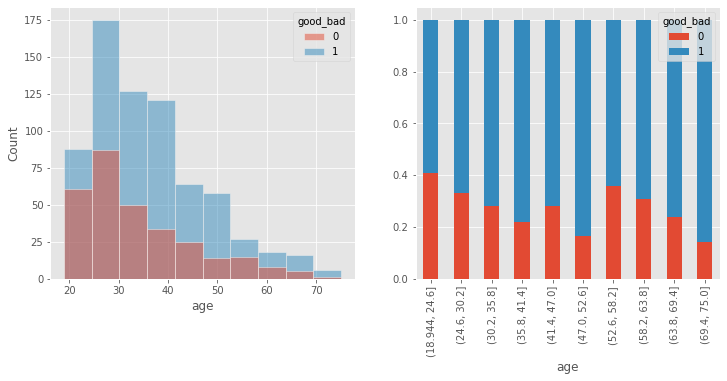

age  IV :  0.10825053399182281


<Figure size 432x288 with 0 Axes>

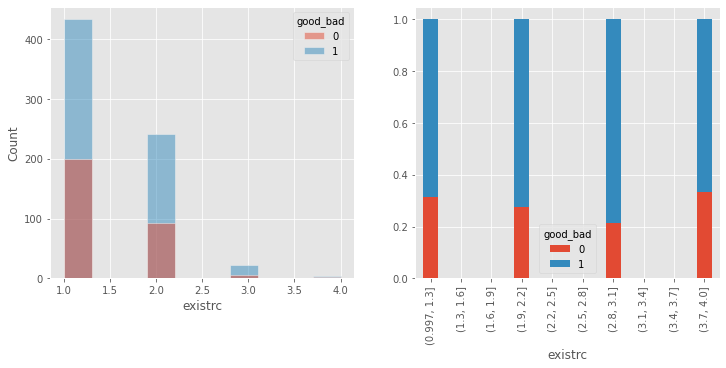

existrc  IV :  0.013266524242854377


<Figure size 432x288 with 0 Axes>

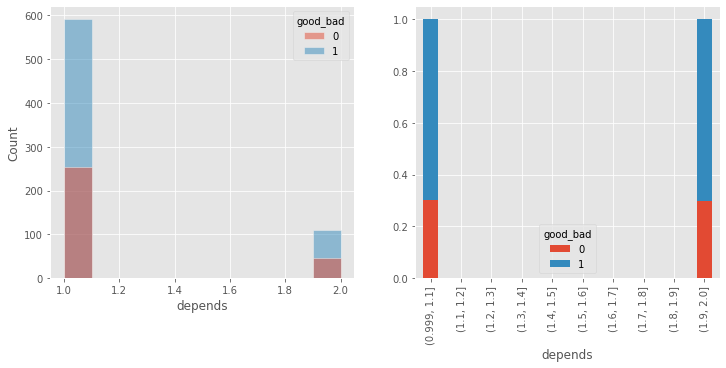

depends  IV :  4.339222702973195e-05


/usr/local/lib/python3.8/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Figure size 432x288 with 0 Axes>

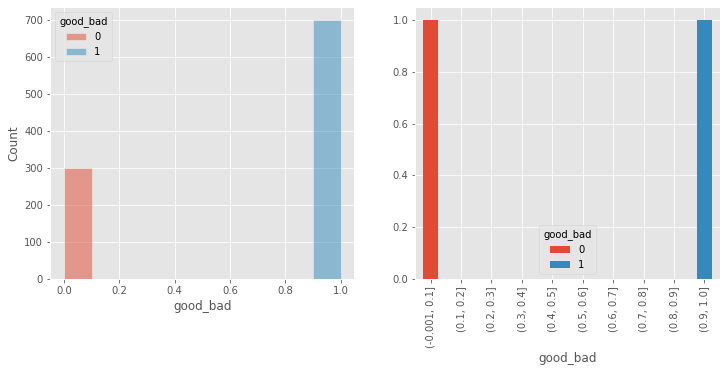

good_bad  IV :  inf


In [ ]:
## 연속형 변수 그래프 생성
for i in int_colname :
  hist_plot(i,'good_bad',10)

### 4.3 명목형 변수 탐색

<Figure size 432x288 with 0 Axes>

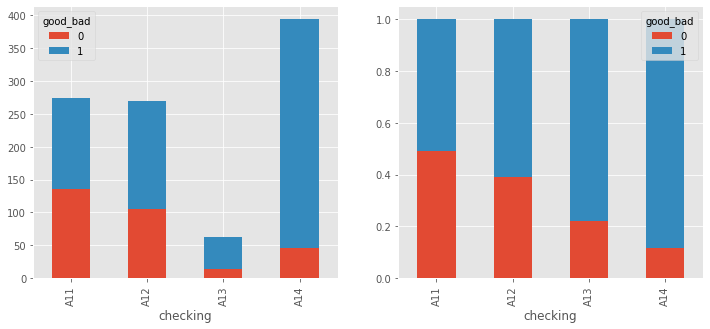

checking  IV :  0.6660115033513336


<Figure size 432x288 with 0 Axes>

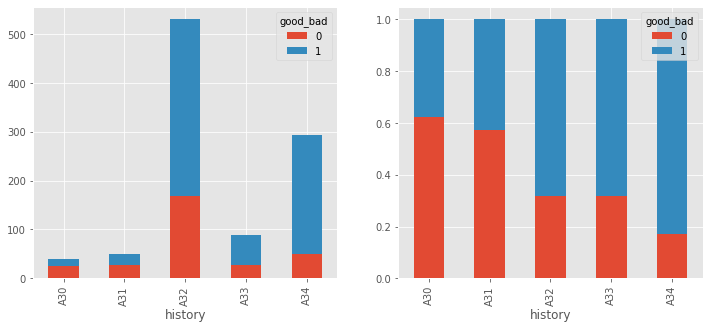

history  IV :  0.2932335473908263


<Figure size 432x288 with 0 Axes>

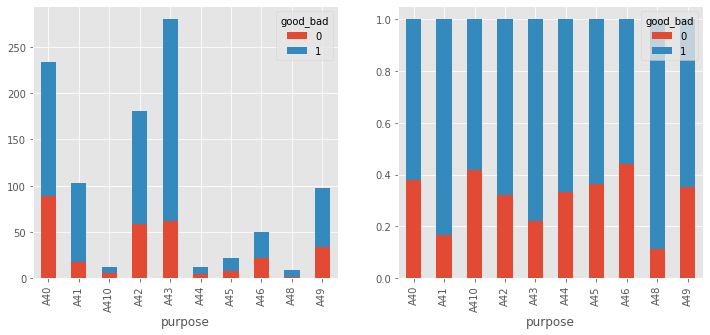

purpose  IV :  0.16919506567307832


<Figure size 432x288 with 0 Axes>

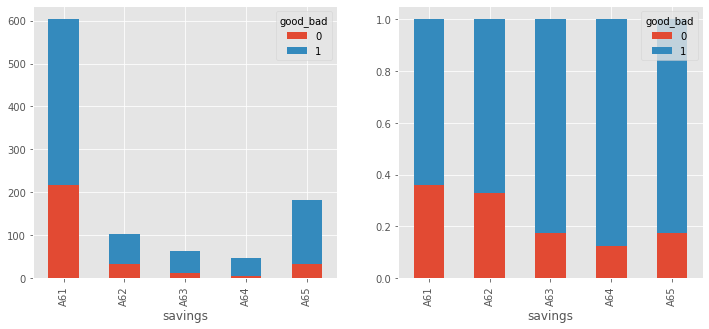

savings  IV :  0.19600955690422672


<Figure size 432x288 with 0 Axes>

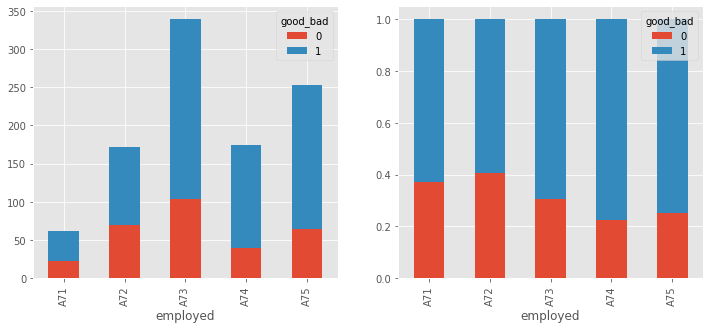

employed  IV :  0.086433631026641


<Figure size 432x288 with 0 Axes>

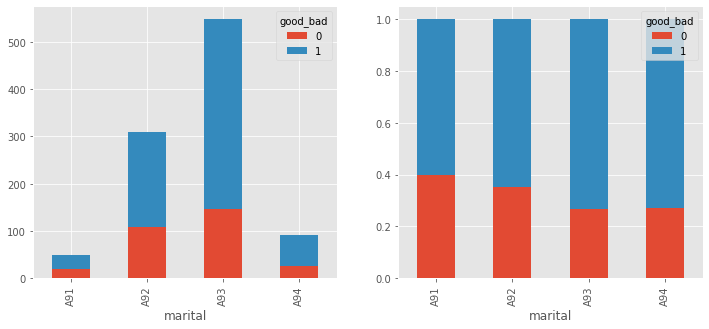

marital  IV :  0.04467067763379073


<Figure size 432x288 with 0 Axes>

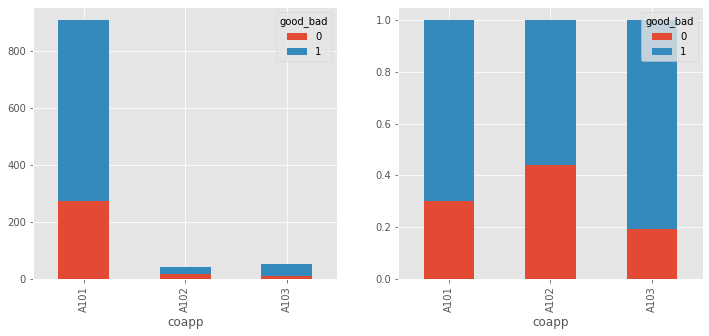

coapp  IV :  0.032019322019485055


<Figure size 432x288 with 0 Axes>

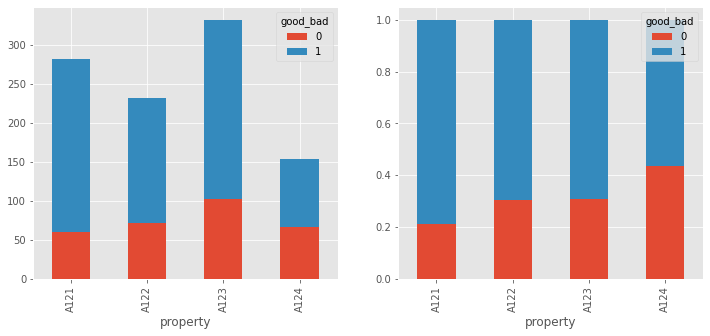

property  IV :  0.11263826240979674


<Figure size 432x288 with 0 Axes>

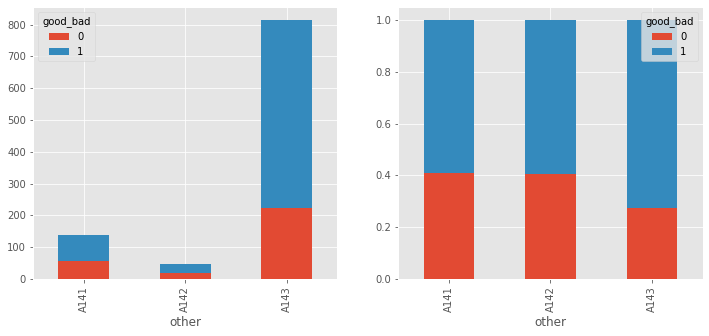

other  IV :  0.057614541955647885


<Figure size 432x288 with 0 Axes>

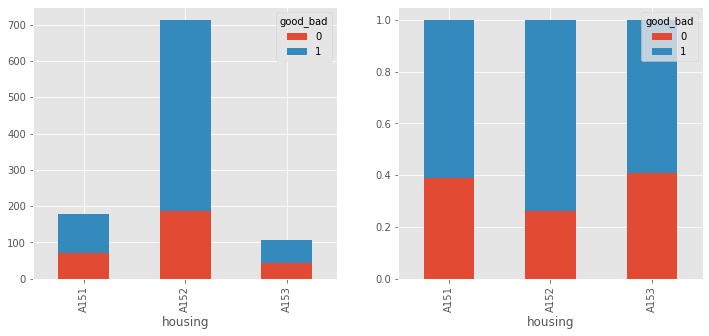

housing  IV :  0.08329343361549926


<Figure size 432x288 with 0 Axes>

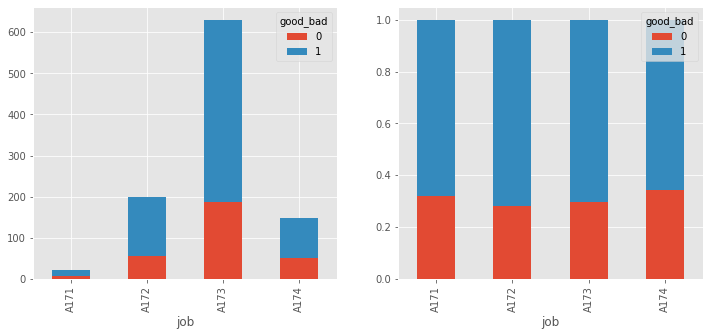

job  IV :  0.008762765707428294


<Figure size 432x288 with 0 Axes>

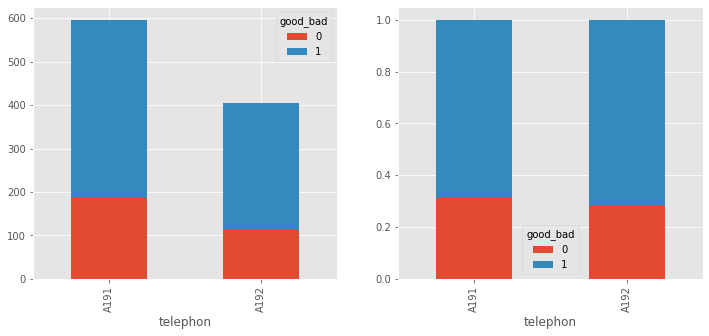

telephon  IV :  0.0063776050286746735


<Figure size 432x288 with 0 Axes>

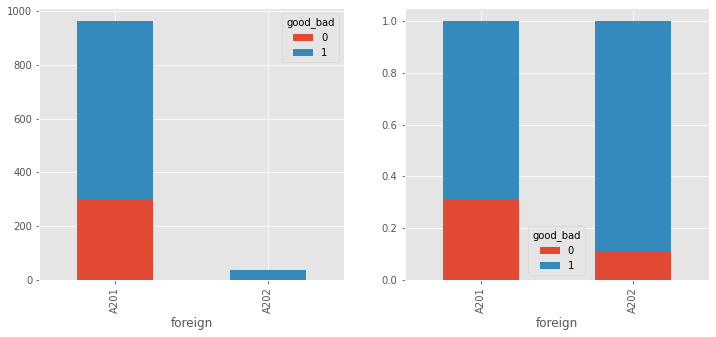

foreign  IV :  0.04387741201028899


In [ ]:
## 명목형 변수 그래프 생성
for i in cat_colname :
  bar_plot(i,'good_bad')


# 5.변수 파생 (feature engineering)

### 5.1 변수 구간화 설명
* 로지스틱 회귀분석의 특성상
* 연속형 변수는 값이 1단위 증가함에따라 오즈비의 증감이 베타값으로 표현됨
* 명목형 변수는 첫번째 카테고리 대비 각 카테고리의 오즈비의 증감을 베타값(변수별 가중치)으로 표현됨
* 그렇기 때문에 각변수의 점수와 스코어를 한눈에 보기 위해서 
* bad 비율이 가장 높은 쪽이 첫 카테고리가 되도록 변수를 서열화 함
* 또한 이렇게 만들어야 카테고리 변수의 다중 공선성 확인을 하기 쉬움.



---
## **- 변수구간화가 제일 시간이 많이 걸린다!**

###5.2 변수 서열화 및 구간화  
- checking (당좌예금 계좌 상태) :그대로 사용 
- duration (신용거래 개월수): 17개월 이하, 44개월 이하, 44개월 초과로 구간화 
- history (신용이력) : A30~ A31 , A32 ~ A33, A34 로 구간화
- purpose (대출 목적): A40, A46 ~ A410, A42 ~ A45, A41 
- amount (신용대출 금액): 11000초과, 11000 이하, 4000 이하
- savings (보통예금 계좌 평잔): A65, A61,A62
- employed (현직장 재직기간): A71 ~ A72, A73, A74 ~ A75
- installp (소득대비 대출금비율): ~3.5, ~ 2.5, ~ 1.5, 1.5 ~
- marital (결혼여부 및 성별): A91, A92 & A95, A93, A94
- coapp (채무관계): A101, A102 ~ A103
- resident (현 거주지 거주기간): <= 1 ,  >1  
- property (재산): A124, A122 ~ A123, A121
- age (나이):  >52 & <= 60  , <= 33 , >33 & <= 52, >60
- other (기타 할부 거래): A141 ~ A142 , A143 ~
- housing (주거형태): A153, A151, A152
- existrc (당행 현재 대출건수): <= 1, > 1
- job (직업): A174 , A173, A171 ~ A172
- depends (부양가족수): 0 , <= 1 , >1
- telephon (전화소유): A191, A192
- foreign (외국인여부): A201, A202



In [ ]:
# 머신러닝용 데이터셋 생성 및 변수 변환
dataset = data.copy()
dataset['checking'] = dataset['checking'].str.replace('A','B')
dataset['duration'] = dataset['duration'].apply(lambda x: 'B23' if x <= 17 else ('B22' if x <= 44 else 'B21'))
dataset['history'] = dataset['history'].apply(lambda x: 'B31' if (x == 'A30') | (x == 'A31') else ('B32' if x == 'A32' else ('B33' if  x == 'A33' else 'B34')))
dataset['purpose'] = dataset['purpose'].apply(lambda x: 'B40' if (x == 'A40') else ('B43' if x == 'A41' else ('B42' if  (x == 'A42') | (x == 'A43') | (x == 'A44') | (x == 'A45') else 'B41')))
dataset['amount'] = dataset['amount'].apply(lambda x: 'B53' if x <= 4000 else ('B52' if x <= 11000 else 'B51'))
dataset['savings'] = dataset['savings'].apply(lambda x: 'B61' if (x == 'A65')|(x == 'A61')|(x == 'A62') else ('B62' if x == 'A63' else 'B63'))
dataset['employed'] = dataset['employed'].apply(lambda x: 'B71' if (x == 'A71')|(x == 'A72')else ('B72' if x == 'A73' else 'B73'))
dataset['marital'] = dataset['marital'].apply(lambda x: 'B91' if x == 'A91' else ('B92' if (x == 'A92')|(x == 'A95') else ('B94' if x == 'A93' else 'B93')))
dataset['coapp'] = dataset['coapp'].apply(lambda x: 'B101' if x == 'A101' else 'B102')
dataset['resident'] = dataset['resident'].apply(lambda x: 'B112' if x <= 1 else 'B111')
dataset['property'] = dataset['property'].apply(lambda x: 'B123' if x == 'A121' else ('B122' if (x == 'A122')|(x == 'A123') else 'B121'))
dataset['age'] = dataset['age'].apply(lambda x: 'B132' if x <= 33 else ('B133' if x <= 52 else ('B131' if x <= 60 else 'B134' )))
dataset['other'] = dataset['other'].apply(lambda x: 'B141' if  (x == 'A141')|(x == 'A142') else 'B142')
dataset['housing'] = dataset['housing'].apply(lambda x: 'B151' if x == 'A153' else ('B152' if x == 'A151' else 'B153' ))
dataset['existrc'] = dataset['existrc'].apply(lambda x: 'B161' if x <= 1 else 'B162')
dataset['job'] = dataset['job'].apply(lambda x: 'B173' if  (x == 'A171')|(x == 'A172') else ('B172' if x == 'A173' else 'B171' ))
dataset['depends'] = dataset['depends'].apply(lambda x: 'B181' if x == 0 else ('B182' if x <= 1 else 'B83'))
dataset['telephon'] = dataset['telephon'].str.replace('A','B')
dataset['foreign'] = dataset['foreign'].str.replace('A','B')
dataset.drop('bin', axis= 1, inplace = True)
dataset.head()

,checking,duration,history,purpose,amount,savings,employed,installp,marital,coapp,resident,property,age,other,housing,existrc,job,depends,telephon,foreign,good_bad
0,B11,B23,B34,B42,B53,B61,B73,4,B94,B101,B111,B123,B134,B142,B153,B162,B172,B182,B192,B201,1
1,B12,B21,B32,B42,B52,B61,B72,2,B92,B101,B111,B123,B132,B142,B153,B161,B172,B182,B191,B201,0
2,B14,B23,B34,B41,B53,B61,B73,2,B94,B101,B111,B123,B133,B142,B153,B161,B173,B83,B191,B201,1
3,B11,B22,B32,B42,B52,B61,B73,2,B94,B102,B111,B122,B133,B142,B151,B161,B172,B83,B191,B201,1
4,B11,B22,B33,B40,B52,B61,B72,3,B94,B101,B111,B121,B131,B142,B151,B162,B172,B83,B191,B201,0


###5.3 변수의 서열화 확인

In [ ]:
# 명속형 변수 그래프 생성 함수 
def bar_plot (colname, taget_colname): # colname : 그래프 그릴 컬럼명 , taget_colname: target 컬럼명

## 그래프용 데이터 생성 
  temp = dataset.reset_index().groupby([colname,taget_colname]).index.count()
  temp = temp.reset_index()
  temp = temp.pivot(index = colname, columns = taget_colname, values ='index')
  temp['row_sum'] = temp.sum(axis=1)
  temp['0_rate'] = temp[0]/temp['row_sum']
  temp['1_rate'] = temp[1]/temp['row_sum']
# IV 계산을 위한 데이터  
  temp['col_0_rate']= temp[0]/temp.sum(axis =0)[0]
  temp['col_1_rate']= temp[1]/temp.sum(axis =0)[1]
  temp['woe'] =np.log(temp['col_1_rate']/temp['col_0_rate'])
  temp['diff_rate'] = temp['col_1_rate'] - temp['col_0_rate'] 
  temp['iv'] = temp['diff_rate'] *temp['woe']
## 그래프
  fig = plt.figure()
  aig, ax = plt.subplots(ncols = 2 , figsize =(12,5))
## 빈도 막대 그래프 
  temp[[0,1]].plot.bar(stacked = True ,ax= ax[0])
  ax[0].legend(labels=[0,1],title =taget_colname) # 범례 순서 바꾸기 
  plt.xlabel(colname)
## 구간별 타겟 비율 막대 그래프 
  temp[['0_rate','1_rate']].plot.bar(stacked = True ,ax= ax[1])
  ax[1].legend(labels=[0,1],title =taget_colname) # 범례 순서 바꾸기 
  plt.xlabel(colname)
  plt.show()
  
  print(colname," IV : ",temp.sum(axis =0)['iv'])

<Figure size 432x288 with 0 Axes>

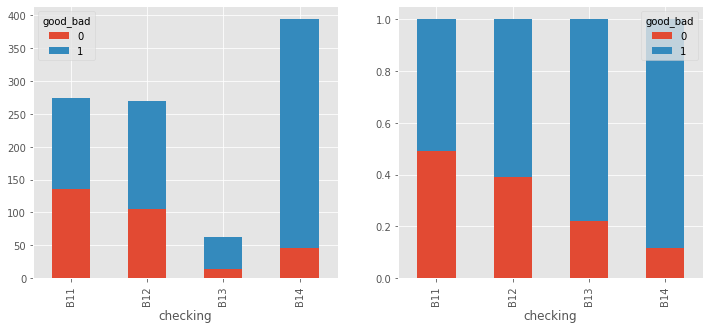

checking  IV :  0.6660115033513336


<Figure size 432x288 with 0 Axes>

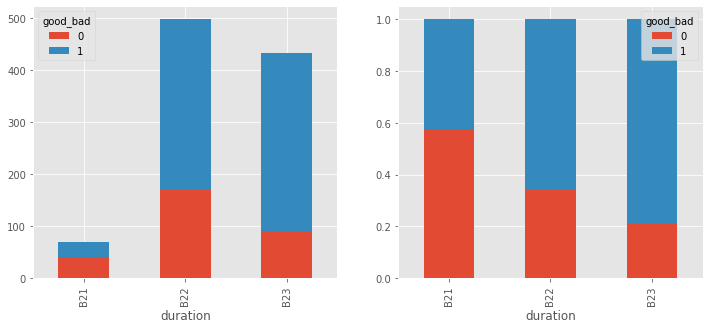

duration  IV :  0.2151286577853578


<Figure size 432x288 with 0 Axes>

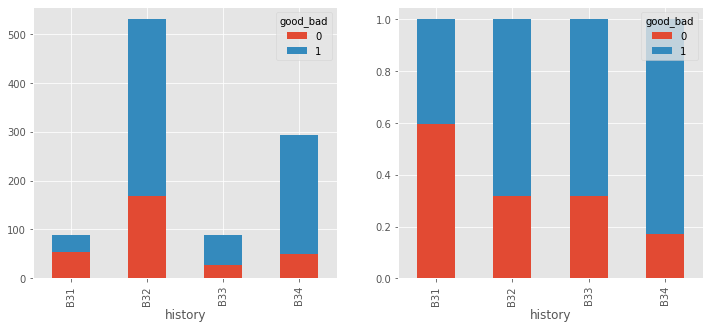

history  IV :  0.2918298548787241


<Figure size 432x288 with 0 Axes>

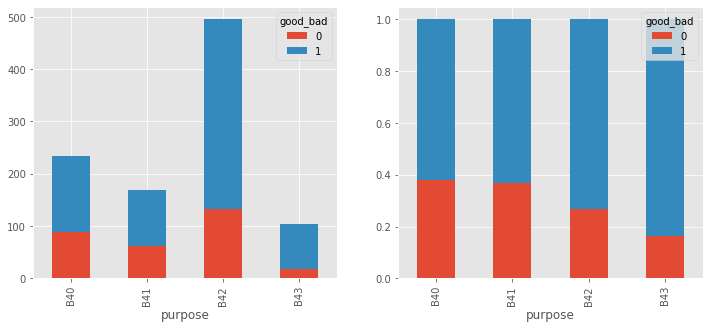

purpose  IV :  0.11346577022151327


<Figure size 432x288 with 0 Axes>

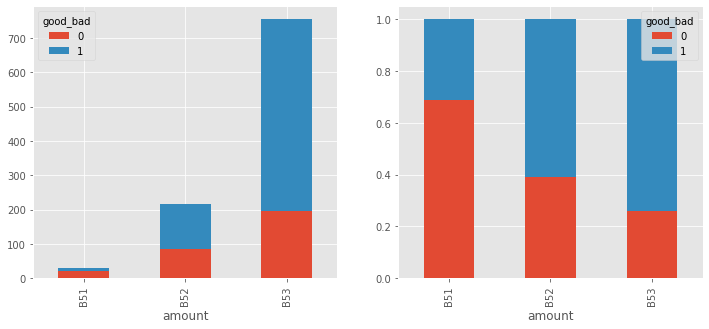

amount  IV :  0.1577257907009501


<Figure size 432x288 with 0 Axes>

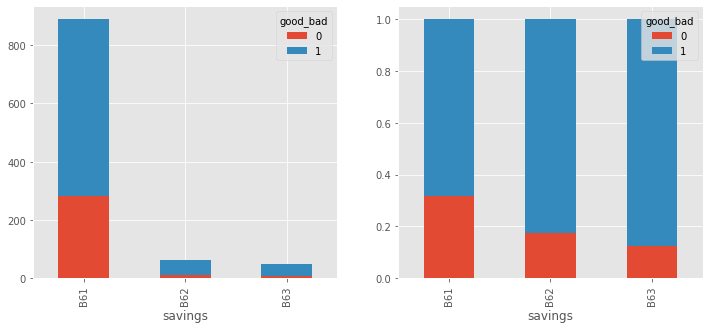

savings  IV :  0.07717018396383679


<Figure size 432x288 with 0 Axes>

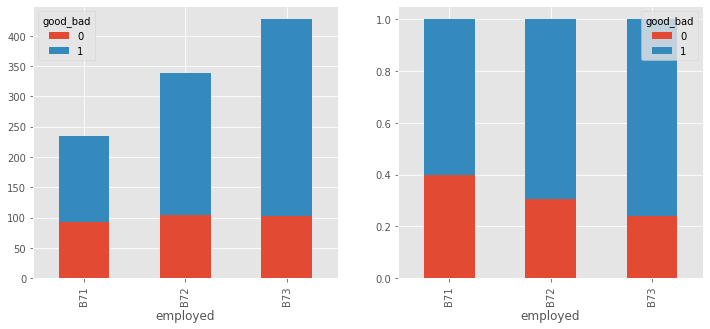

employed  IV :  0.08286457128852001


<Figure size 432x288 with 0 Axes>

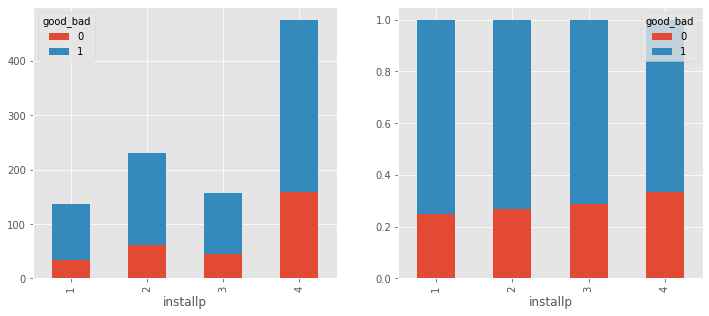

installp  IV :  0.026322090054334526


<Figure size 432x288 with 0 Axes>

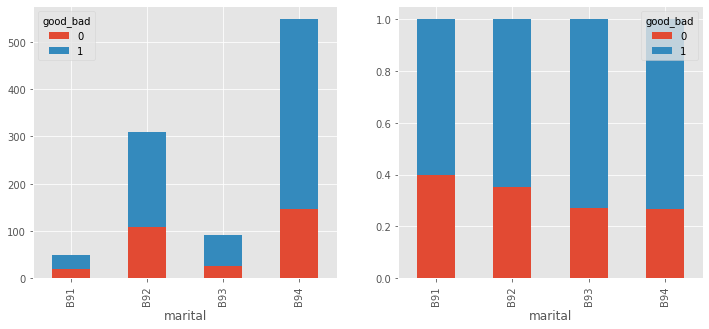

marital  IV :  0.04467067763379073


<Figure size 432x288 with 0 Axes>

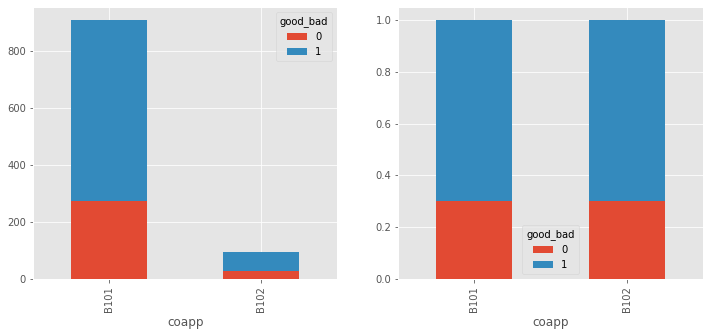

coapp  IV :  2.685796607743458e-06


<Figure size 432x288 with 0 Axes>

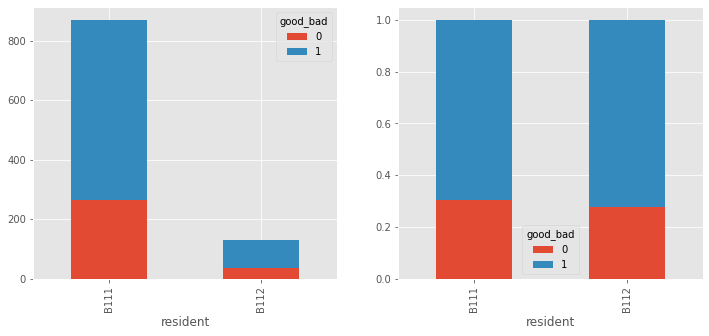

resident  IV :  0.0018406422984413647


<Figure size 432x288 with 0 Axes>

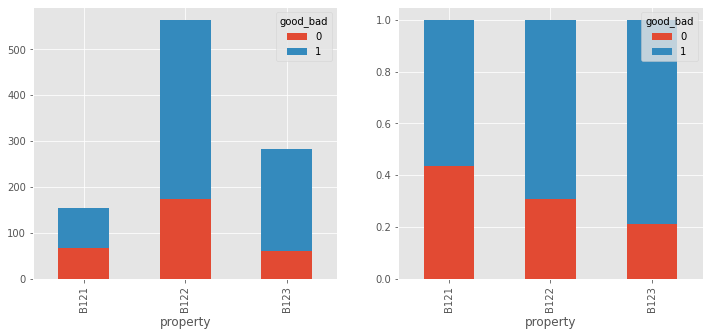

property  IV :  0.11263392528503957


<Figure size 432x288 with 0 Axes>

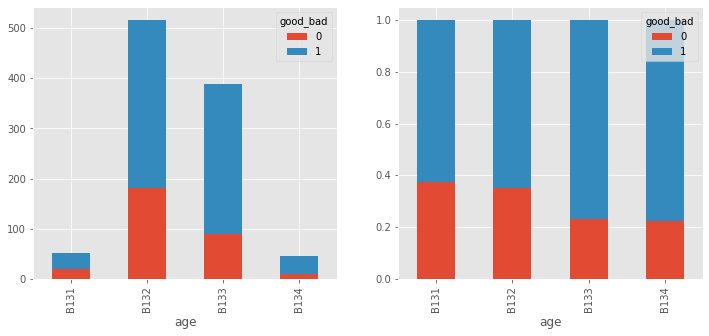

age  IV :  0.08540269906982004


<Figure size 432x288 with 0 Axes>

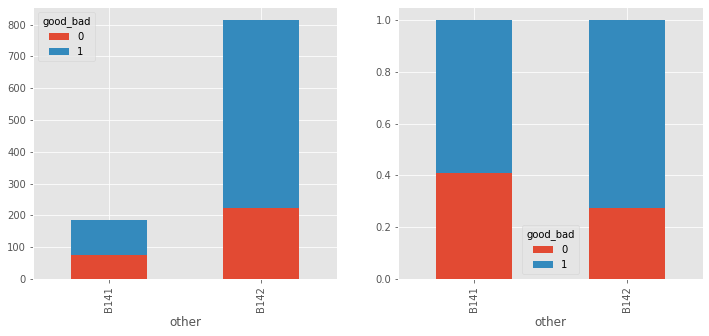

other  IV :  0.057592071822288274


<Figure size 432x288 with 0 Axes>

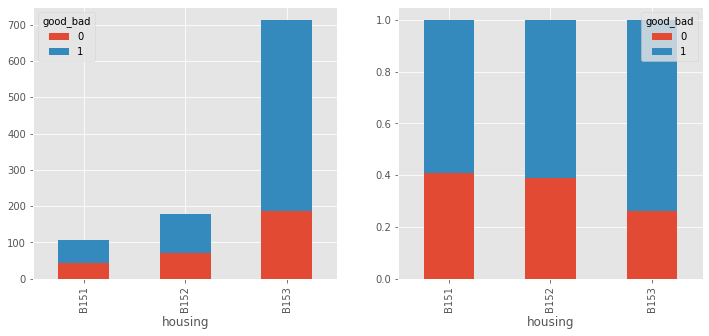

housing  IV :  0.08329343361549925


<Figure size 432x288 with 0 Axes>

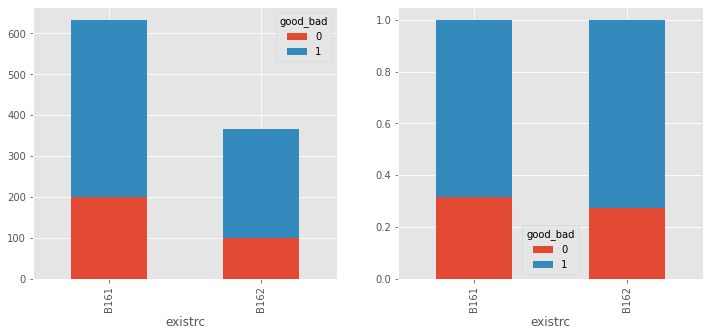

existrc  IV :  0.010083556765108678


<Figure size 432x288 with 0 Axes>

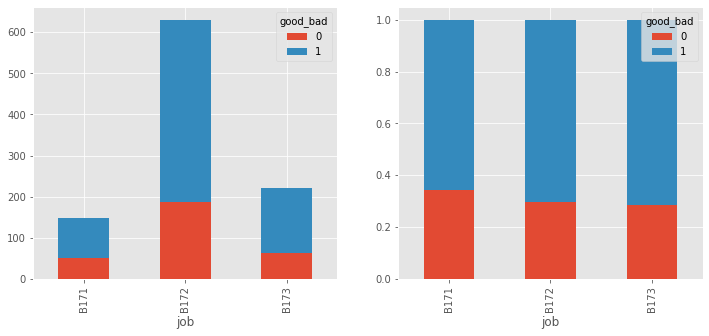

job  IV :  0.008095049985707675


<Figure size 432x288 with 0 Axes>

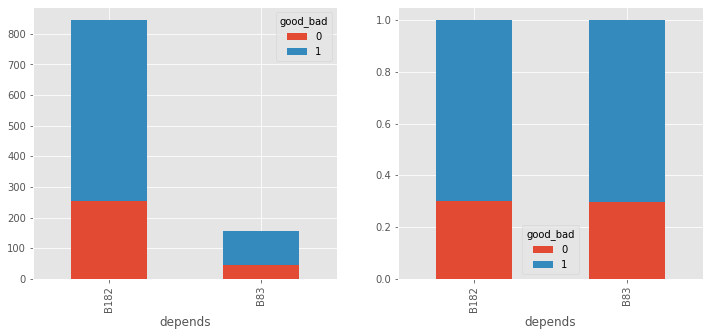

depends  IV :  4.339222702973195e-05


<Figure size 432x288 with 0 Axes>

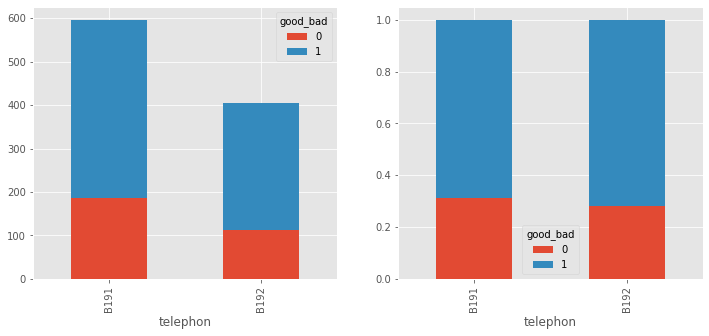

telephon  IV :  0.0063776050286746735


<Figure size 432x288 with 0 Axes>

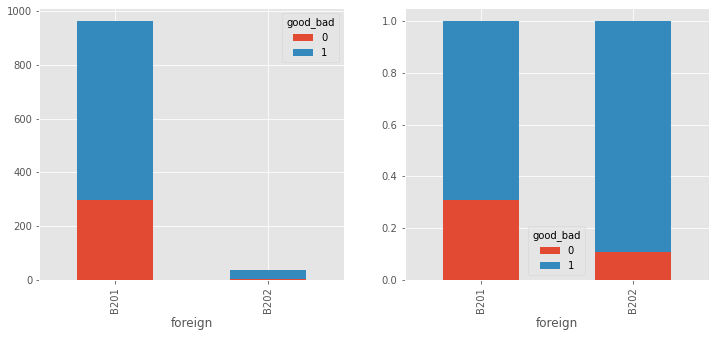

foreign  IV :  0.04387741201028899


In [ ]:
lm_col_names = dataset.iloc[:,0:20].columns

for i in lm_col_names :
  bar_plot(i,'good_bad')

#6.모델링

##6.1 데이터 세트 분할 및 미사용 변수 제거 



In [ ]:
# IV 값이 0.04 이하인 installp	coapp	resident existrc	job	depends	telephon	foreign	제거 

ML_dataset = dataset.drop(['installp','coapp','resident','existrc','job','depends','telephon','foreign','housing'],axis= 1)
ML_dataset.head()

,checking,duration,history,purpose,amount,savings,employed,marital,property,age,other,good_bad
0,B11,B23,B34,B42,B53,B61,B73,B94,B123,B134,B142,1
1,B12,B21,B32,B42,B52,B61,B72,B92,B123,B132,B142,0
2,B14,B23,B34,B41,B53,B61,B73,B94,B123,B133,B142,1
3,B11,B22,B32,B42,B52,B61,B73,B94,B122,B133,B142,1
4,B11,B22,B33,B40,B52,B61,B72,B94,B121,B131,B142,0


##6.2 명목형 변수 더미화

In [ ]:
ML_dataset = pd.get_dummies(ML_dataset)
ML_dataset.head()

,good_bad,checking_B11,checking_B12,checking_B13,checking_B14,duration_B21,duration_B22,duration_B23,history_B31,history_B32,history_B33,history_B34,purpose_B40,purpose_B41,purpose_B42,purpose_B43,amount_B51,amount_B52,amount_B53,savings_B61,savings_B62,savings_B63,employed_B71,employed_B72,employed_B73,marital_B91,marital_B92,marital_B93,marital_B94,property_B121,property_B122,property_B123,age_B131,age_B132,age_B133,age_B134,other_B141,other_B142
0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,1
1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,1
2,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1
3,1,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,1
4,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,1


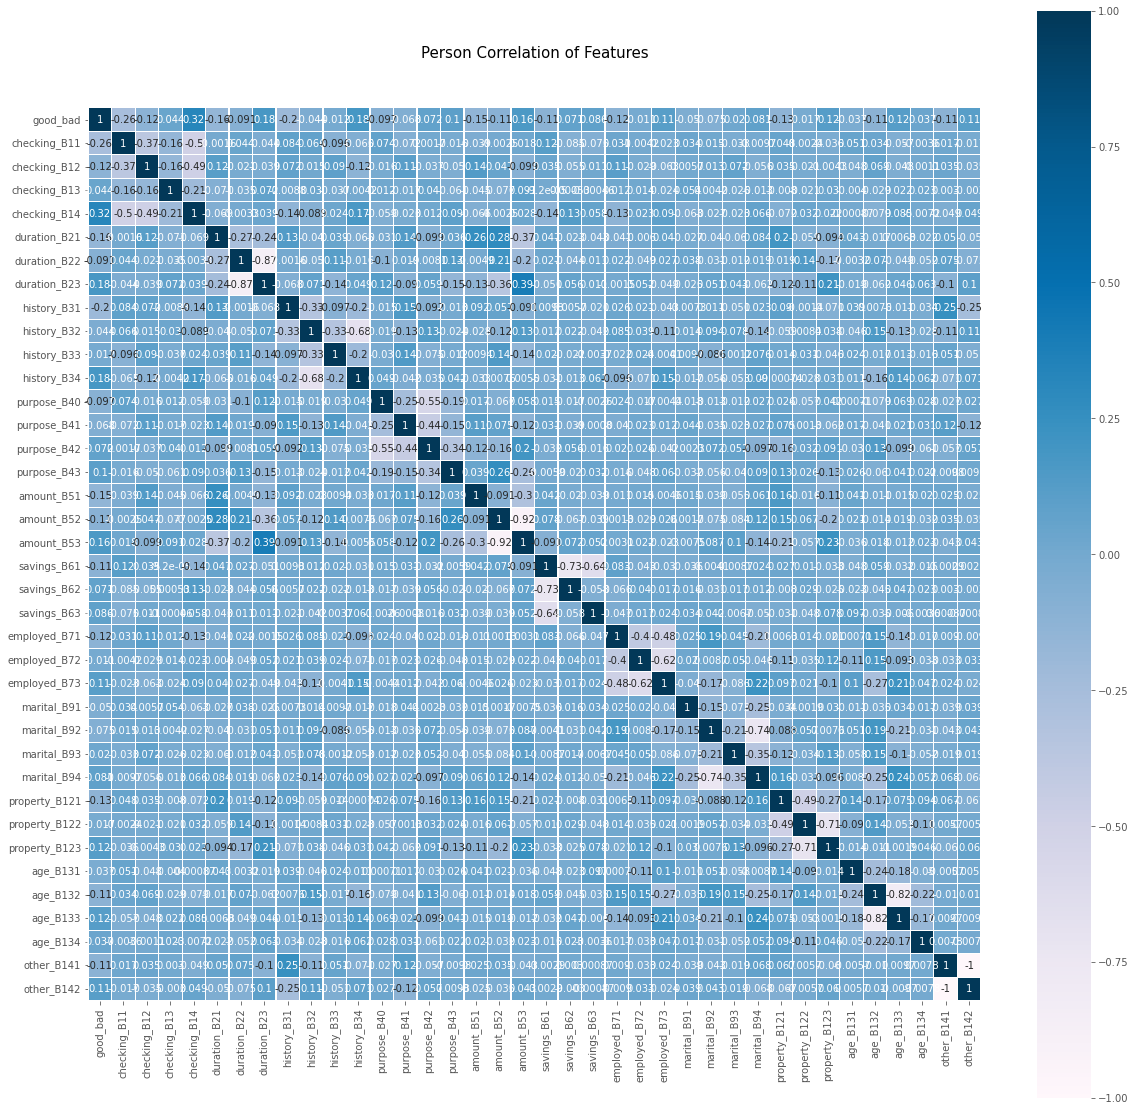

In [ ]:
# 변수간의 상관분석 
## >>>> 0.6이상이면 다중공산성있으니까 빼주기!!!!!!!!!!!!!
colormap = plt.cm.PuBu
plt.figure(figsize=(20,20))
plt.title("Person Correlation of Features", y = 1.05, size = 15)
sns.heatmap(ML_dataset.corr(), linewidths = 0.1, vmax = 1.0,square = True, cmap = colormap, linecolor = "white", annot = True)

##6.3 데이터셋 분리

In [ ]:
# from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split (ML_dataset.iloc[:,1:],ML_dataset.iloc[:,0], test_size =0.2, random_state=0)

print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (800, 37)
X_test shape:  (200, 37)
y_train shape:  (800,)
y_test shape:  (200,)


In [ ]:
y_train.value_counts(normalize = True)


1    0.6975
0    0.3025
Name: good_bad, dtype: float64

## 6.4 학습

####  사이킷런에 있는 로지스틱 회귀분석을 이용 

In [ ]:
#from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
# 로지스틱회귀분석은 parameter조정할거 없음
model.fit(X_train,y_train)

print(model.coef_)

print(model.intercept_)

[[-0.86558005 -0.22190806  0.20579354  0.88175002 -0.66585439  0.01156394
   0.65434589 -0.94928464  0.01962146  0.2954084   0.63431022 -0.75024328
  -0.28755422 -0.1022989   1.14015184 -0.80948949  0.17243368  0.63711125
  -0.16150569 -0.14145357  0.30301471 -0.26361891 -0.05232869  0.31600305
  -0.35064423 -0.04141588  0.15269552  0.23942003 -0.37115194 -0.0760101
   0.44721748 -0.26658676 -0.13884088  0.11468301  0.29080007 -0.16663294
   0.16668839]]
[0.18250004]


#### stats model 의 로지스틱 회귀분석 이용

In [ ]:
# import statsmodels.api as sm
# stat모델에서는 y절편값을 꼭 넣어줘야한다,
X_train = sm.add_constant(X_train) # constant를 1로 설정
X_train.head()

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,const,checking_B11,checking_B12,checking_B13,checking_B14,duration_B21,duration_B22,duration_B23,history_B31,history_B32,history_B33,history_B34,purpose_B40,purpose_B41,purpose_B42,purpose_B43,amount_B51,amount_B52,amount_B53,savings_B61,savings_B62,savings_B63,employed_B71,employed_B72,employed_B73,marital_B91,marital_B92,marital_B93,marital_B94,property_B121,property_B122,property_B123,age_B131,age_B132,age_B133,age_B134,other_B141,other_B142
687,1.0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,1
500,1.0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1
332,1.0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1
979,1.0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1
817,1.0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,1


In [ ]:
# stats model 의 로지시틱 회귀 모형 사용 
# import statsmodels.api as sm
X_train = sm.add_constant(X_train)

logit = sm.Logit(y_train, X_train) 

result = logit.fit()

print(result.summary())
# checking_B11     -0.8910 ; 베타값!(coef)
# 변수별로 가장 첫번째 카테고리가 베타값이 가장 낮으니까, 가장 안좋은값..?
# 다중공산성이 발생한다면? 카테고리가 a보다 b에서 이탈율이 높았는데, coef값이 역전된다면?>> 다중공산성으로 판정!
# R에서는 음수가 안나오니까, coef가 음수면 바로 다중공산성이라고 하면 된다.
# python에서는 coef에 역전이 생기면 다중공선성이라고 보면 된다.


         Current function value: 0.460045
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:               good_bad   No. Observations:                  800
Model:                          Logit   Df Residuals:                      773
Method:                           MLE   Df Model:                           26
Date:                Sat, 18 Feb 2023   Pseudo R-squ.:                  0.2495
Time:                        03:28:07   Log-Likelihood:                -368.04
converged:                      False   LL-Null:                       -490.37
Covariance Type:            nonrobust   LLR p-value:                 1.923e-37
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0241   8.09e+06   2.98e-09      1.000   -1.59e+07    1.59e+07
checking_B11     -0.8910   9.14e+06  -9.75e-08      1.00

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
LR_y_pred = model.predict(X_test)

LR_result = pd.DataFrame({'pred' : LR_y_pred, 'real' : y_test})

LR_result.head()

,pred,real
993,0,1
859,1,1
298,1,1
553,1,1
672,1,1


## *6.5* 평가

Model accuracy : 0.7400
[[ 29  29]
 [ 23 119]]
              precision    recall  f1-score   support

           0       0.56      0.50      0.53        58
           1       0.80      0.84      0.82       142

    accuracy                           0.74       200
   macro avg       0.68      0.67      0.67       200
weighted avg       0.73      0.74      0.74       200

test_AUC :  0.7492714910150559


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


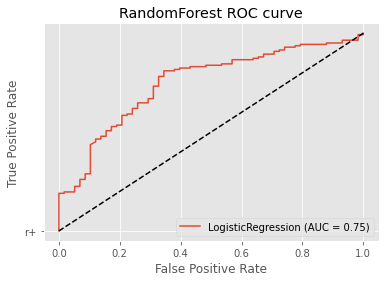

In [ ]:
# 정확도 확인
# confusion matrix 확인 
#from sklearn.metrics import accuracy_score
#from sklearn.metrics import confusion_matrix
#from sklearn.metrics import classification_report
#from sklearn.metrics import roc_auc_score
#from sklearn.metrics import plot_roc_curve

print('Model accuracy : {0:0.4f}'. format(accuracy_score(y_test, LR_y_pred)))
print(confusion_matrix(y_test, LR_y_pred))
print(classification_report(y_test, LR_y_pred))
print("test_AUC : ", roc_auc_score(y_test, model.predict_proba(X_test)[:,1]))

# ROC 그래프
plot_roc_curve(model, X_test, y_test) 
plt.plot([0,1], [0,1], "k--", "r+")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('RandomForest ROC curve')
plt.show()

## 6.6 점수화 

In [ ]:
X_train.columns[1:]

Index(['checking_B11', 'checking_B12', 'checking_B13', 'checking_B14',
       'duration_B21', 'duration_B22', 'duration_B23', 'history_B31',
       'history_B32', 'history_B33', 'history_B34', 'purpose_B40',
       'purpose_B41', 'purpose_B42', 'purpose_B43', 'amount_B51', 'amount_B52',
       'amount_B53', 'savings_B61', 'savings_B62', 'savings_B63',
       'employed_B71', 'employed_B72', 'employed_B73', 'marital_B91',
       'marital_B92', 'marital_B93', 'marital_B94', 'property_B121',
       'property_B122', 'property_B123', 'age_B131', 'age_B132', 'age_B133',
       'age_B134', 'other_B141', 'other_B142'],
      dtype='object')

In [ ]:
# 점수화 
model_coef =pd.DataFrame( pd.Series(model.coef_[0], X_train.columns[1:]))
model_coef['score']= model_coef[0]*40/np.log(2)
#  점수별로 40점씩 gap을 두겠다
# log2 : 로지스틱 분류로 되어있던 거를 선형적으로 펴주는 역할(0.69315 = log2)
model_coef['score']
# PDO값을 49.95로 잡으면, coef 음수를 없애고, 0부터 시작하도록 할 수 있다! > 이렇게 하면, R회귀랑 결과 비슷!
# 머신러닝 변수중요도와 달리, 로지스틱 스코어에서는 선형적으로 해석할 수 있다!(스코어가 올라가면 이탈율이 높아요)


checking_B11    -49.950722
checking_B12    -12.805826
checking_B13     11.875893
checking_B14     50.883855
duration_B21    -38.424993
duration_B22      0.667330
duration_B23     37.760863
history_B31     -54.781130
history_B32       1.132311
history_B33      17.047369
history_B34      36.604649
purpose_B40     -43.294891
purpose_B41     -16.594122
purpose_B42      -5.903445
purpose_B43      65.795656
amount_B51      -46.713859
amount_B52        9.950769
amount_B53       36.766290
savings_B61      -9.320139
savings_B62      -8.162975
savings_B63      17.486313
employed_B71    -15.212868
employed_B72     -3.019774
employed_B73     18.235841
marital_B91     -20.234908
marital_B92      -2.390019
marital_B93       8.811723
marital_B94      13.816404
property_B121   -21.418362
property_B122    -4.386376
property_B123    25.807938
age_B131        -15.384136
age_B132         -8.012202
age_B133          6.618105
age_B134         16.781433
other_B141       -9.616021
other_B142        9.619220
N

### HI
---


- 이후 스코어 카드를 만드는건 엑셀작업이야!
- 스코어점수화는 엑셀에서 작업도 가능
#### page45
- 고객등급별로 이탈율이 낮아지는 것 확인 가능!


---
*** 시간될때, 모델별로 정확도 비교해보기!


---




## 정리 


1.로지스틱 회귀 분석에서 변수의 영향력을 보기 좀더 손쉽게 보기 위해서 명목형 구간화를 해 사용한다. 

2.연속형 변수일 경우 target 변수의 우불량 비율(오즈비)가 유사하도록 묶어주는 것이 좋음

3.이를 통해 불량의 비율 단조 증가 또는 단조 감소 하도록 만들어주는것이 필요함

4.최소 구간의 비율은 5% 이상이 되도록 하며, 2~5개 사이로 구간화 하는것을 권장함

5.명목형 변수일 경우 카테고리별 의미를 파악하고 의미가 유사하고, 우불량 비율이 동일한 집단별로 묶어나감

6.명목형 변수는 파생 변수를 만들기 어려움. 

